#  ENERGY AND DATA ENGINERRING 2

# TIMER SERIES ANALYSIS PROJECT-1
       TEAM 1 RAMESH NADIWALE and BHANU SIMHA REDDY MOGI REDDY
       DATA: Total Load- Day Ahead Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Task 1

## Importing the Total Load- Day Ahead Data 

In [2]:
filenames=[
    "Total Load - Day Ahead _ Actual_2019.csv",
    "Total Load - Day Ahead _ Actual_2020.csv",
    "Total Load - Day Ahead _ Actual_2021.csv",
    "Total Load - Day Ahead _ Actual_2022.csv",
    "Total Load - Day Ahead _ Actual_2023.csv",
]
df_names=[pd.read_csv(filename) for filename in filenames]
df= pd.concat(df_names)

In [3]:
df

,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|DE-LU,Actual Total Load [MW] - BZN|DE-LU
0,01.01.2019 00:00 - 01.01.2019 00:15,44216.0,44383.0
1,01.01.2019 00:15 - 01.01.2019 00:30,44008.0,43911.0
2,01.01.2019 00:30 - 01.01.2019 00:45,43454.0,43397.0
3,01.01.2019 00:45 - 01.01.2019 01:00,42912.0,43163.0
4,01.01.2019 01:00 - 01.01.2019 01:15,42397.0,42837.0
...,...,...,...
35039,31.12.2023 22:45 - 31.12.2023 23:00,44331.0,43575.0
35040,31.12.2023 23:00 - 31.12.2023 23:15,43610.0,43459.0
35041,31.12.2023 23:15 - 31.12.2023 23:30,43153.0,42865.0
35042,31.12.2023 23:30 - 31.12.2023 23:45,42419.0,42415.0


## Cleaning of Imported Data
    1.Dropped all "Na" values from the original DataFrame.
    2.Made a copy of the original DataFrame.
    3.Changed the name of the "Time (CET/CEST)" column to "Date_Time".
    4.Converted the "Date_Time" column to the index of the DataFrame

In [4]:
df_1 = df.dropna()
df_1.drop(columns=['Day-ahead Total Load Forecast [MW] - BZN|DE-LU'], inplace=True)
df_1

,Time (CET/CEST),Actual Total Load [MW] - BZN|DE-LU
0,01.01.2019 00:00 - 01.01.2019 00:15,44383.0
1,01.01.2019 00:15 - 01.01.2019 00:30,43911.0
2,01.01.2019 00:30 - 01.01.2019 00:45,43397.0
3,01.01.2019 00:45 - 01.01.2019 01:00,43163.0
4,01.01.2019 01:00 - 01.01.2019 01:15,42837.0
...,...,...
35039,31.12.2023 22:45 - 31.12.2023 23:00,43575.0
35040,31.12.2023 23:00 - 31.12.2023 23:15,43459.0
35041,31.12.2023 23:15 - 31.12.2023 23:30,42865.0
35042,31.12.2023 23:30 - 31.12.2023 23:45,42415.0


In [5]:
df_2= df_1.copy()

In [6]:
df_2['Date_Time'] = df_2['Time (CET/CEST)'].str.split(' - ').str[0]
df_2['Date_Time'] = pd.to_datetime(df_2['Date_Time'], format='%d.%m.%Y %H:%M')
df_2.drop(columns=['Time (CET/CEST)'], inplace=True)
df_2

,Actual Total Load [MW] - BZN|DE-LU,Date_Time
0,44383.0,2019-01-01 00:00:00
1,43911.0,2019-01-01 00:15:00
2,43397.0,2019-01-01 00:30:00
3,43163.0,2019-01-01 00:45:00
4,42837.0,2019-01-01 01:00:00
...,...,...
35039,43575.0,2023-12-31 22:45:00
35040,43459.0,2023-12-31 23:00:00
35041,42865.0,2023-12-31 23:15:00
35042,42415.0,2023-12-31 23:30:00


In [7]:
df_2.set_index('Date_Time', inplace=True)
df_2

,Actual Total Load [MW] - BZN|DE-LU
Date_Time,
2019-01-01 00:00:00,44383.0
2019-01-01 00:15:00,43911.0
2019-01-01 00:30:00,43397.0
2019-01-01 00:45:00,43163.0
2019-01-01 01:00:00,42837.0
...,...
2023-12-31 22:45:00,43575.0
2023-12-31 23:00:00,43459.0
2023-12-31 23:15:00,42865.0


# Plotting of Time Series of Orginial Data

# Obervations from TSA 
    1. The same observation is occurring every year in the time series data, it suggests the presence of a strong seasonal trend
    2. The demand for load is consistently high at the beginning and end of each year compared to the middle of the year.
    3. The observed trend in the years 2021 and 2022 shows a slight decrease,which is not significant and can be disregarded.

# Rolling Mean Plot 
    For the rolling mean we have considered a year as window 

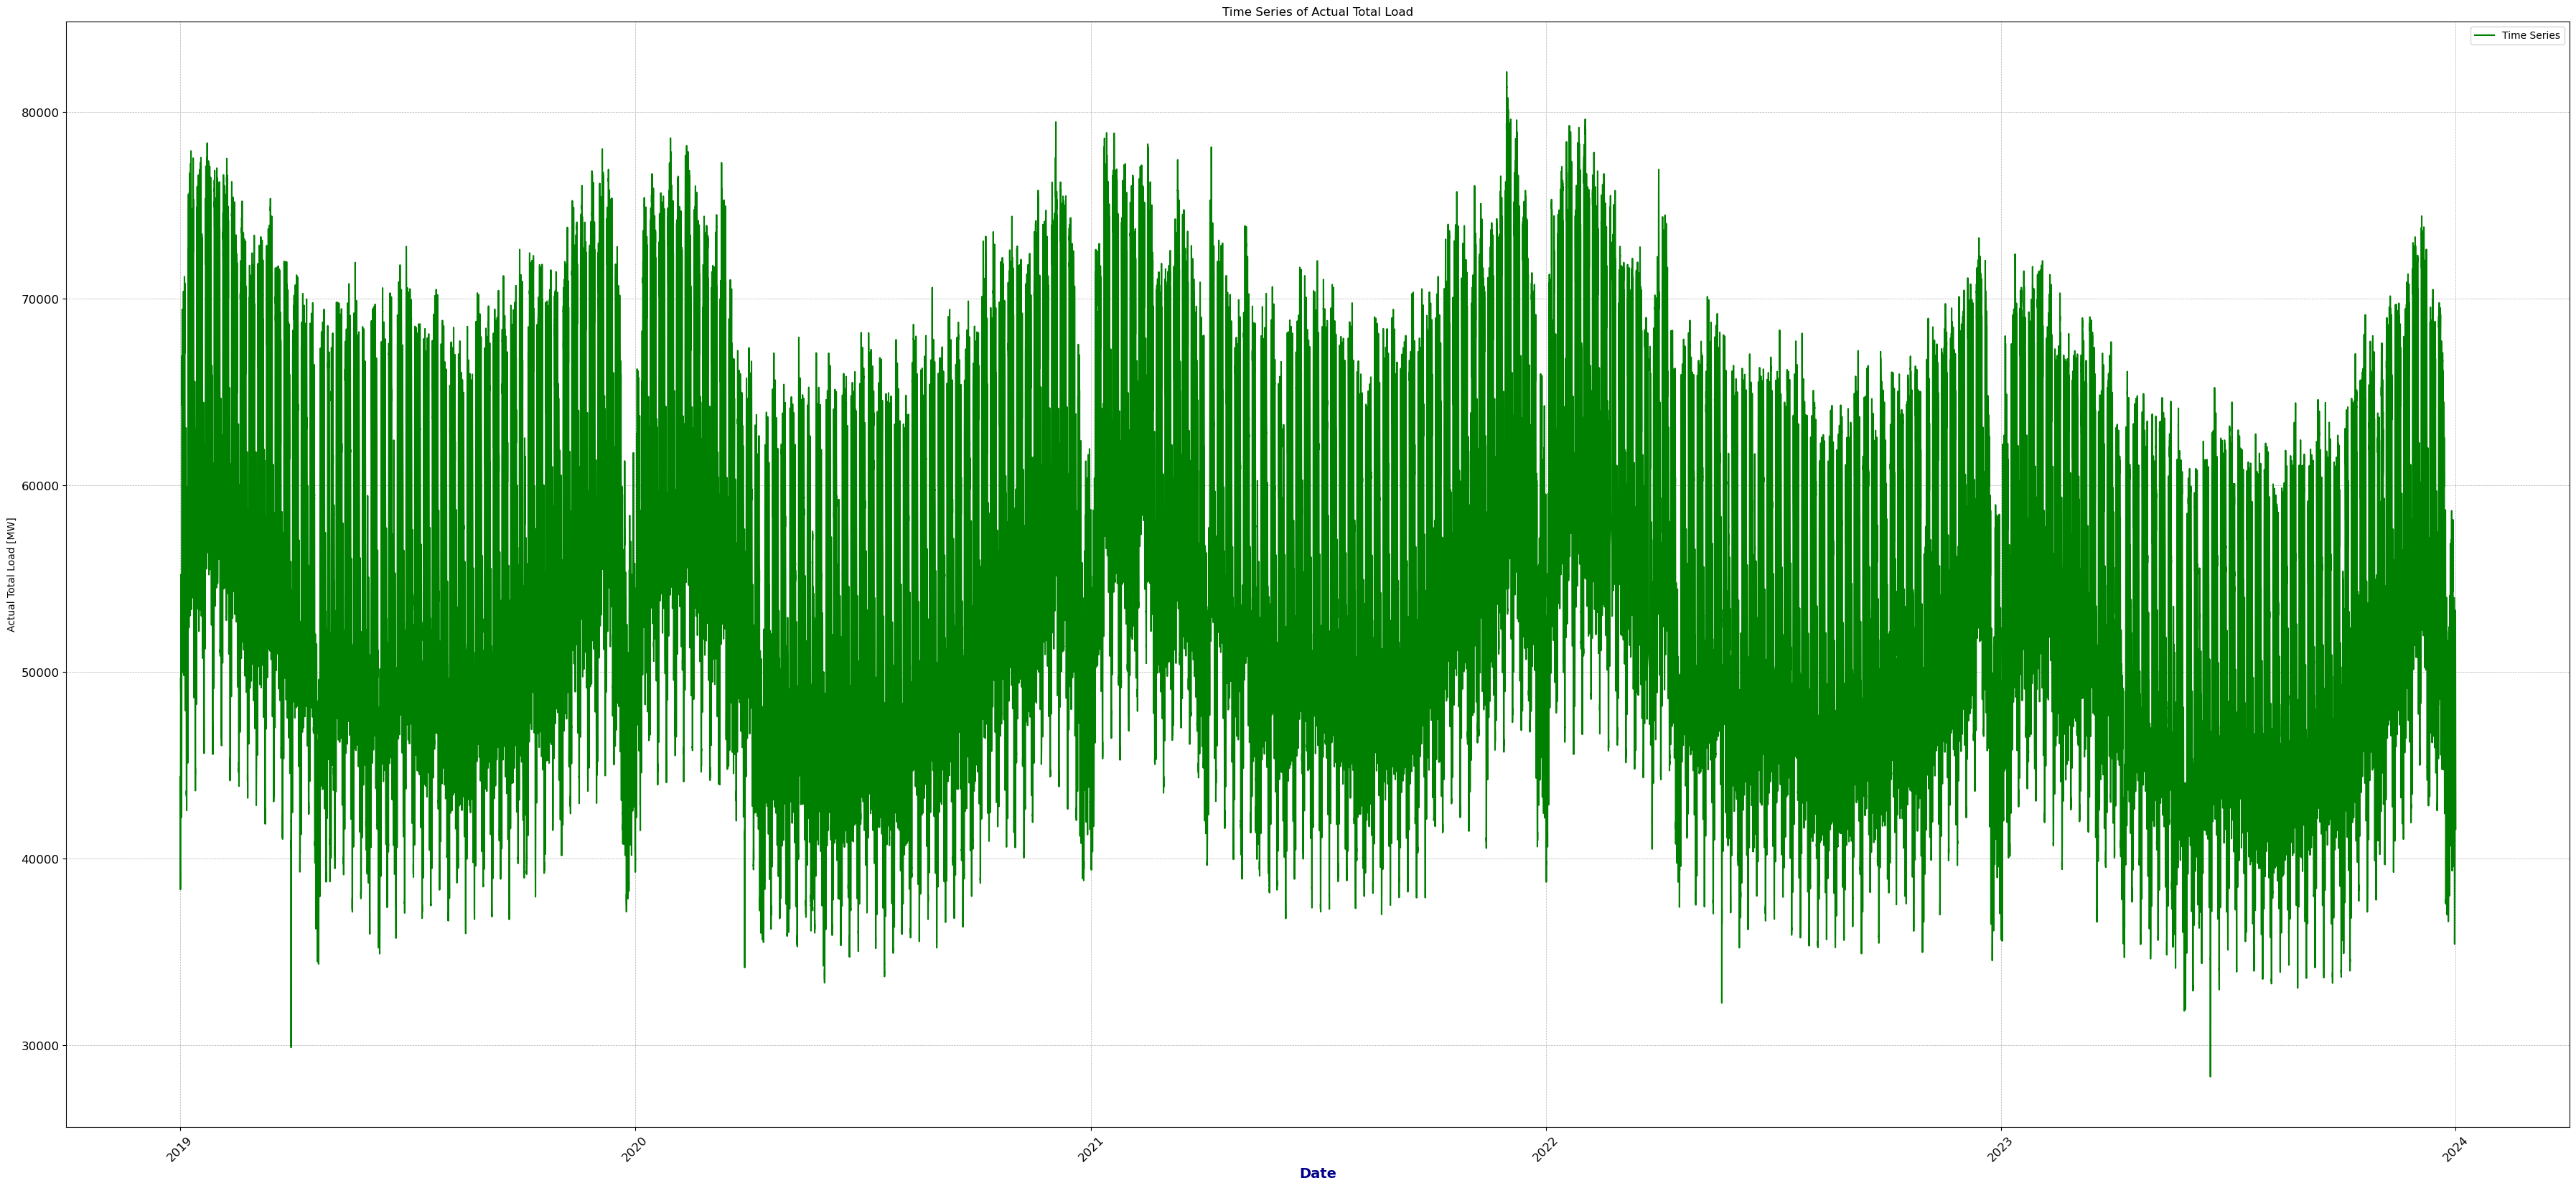

In [8]:
plt.figure(figsize=(45, 20))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Date', fontsize=14, fontweight='bold', color='darkblue')
plt.plot(df_2.index, df_2['Actual Total Load [MW] - BZN|DE-LU'], color='green', label='Time Series')
plt.xlabel('Date')
plt.ylabel('Actual Total Load [MW]')
plt.title('Time Series of Actual Total Load')
plt.legend()
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

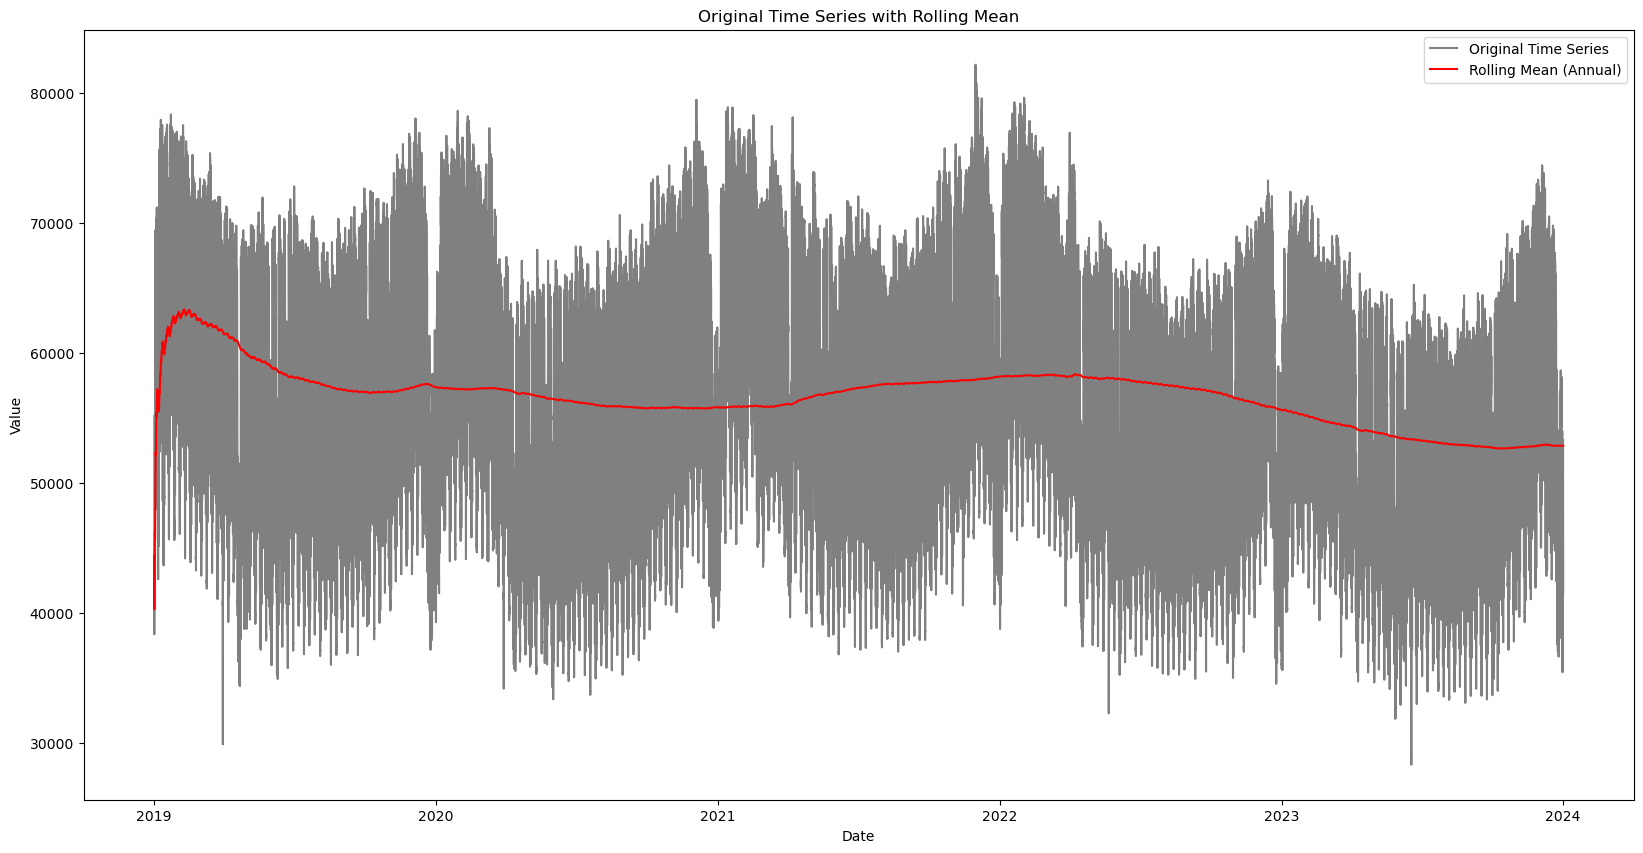

In [9]:
rolling_mean = df_2['Actual Total Load [MW] - BZN|DE-LU'].rolling(window=365*24*4, min_periods=1).mean()
plt.figure(figsize=(20, 10))
plt.plot(df_2.index, df_2['Actual Total Load [MW] - BZN|DE-LU'], color='gray', label='Original Time Series')
plt.plot(df_2.index, rolling_mean, color='red', label='Rolling Mean (Annual)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series with Rolling Mean')
plt.legend()
plt.show()

# Density Plot 
    The maximum value observed in the density plot for 'Actual Total Load [MW] - BZN|DE-LU' is 82,170 MW, indicating a peak load demand. Conversely, the minimum value depicted in the density plot is 28,314 MW, suggesting a period of relatively lower load demand.

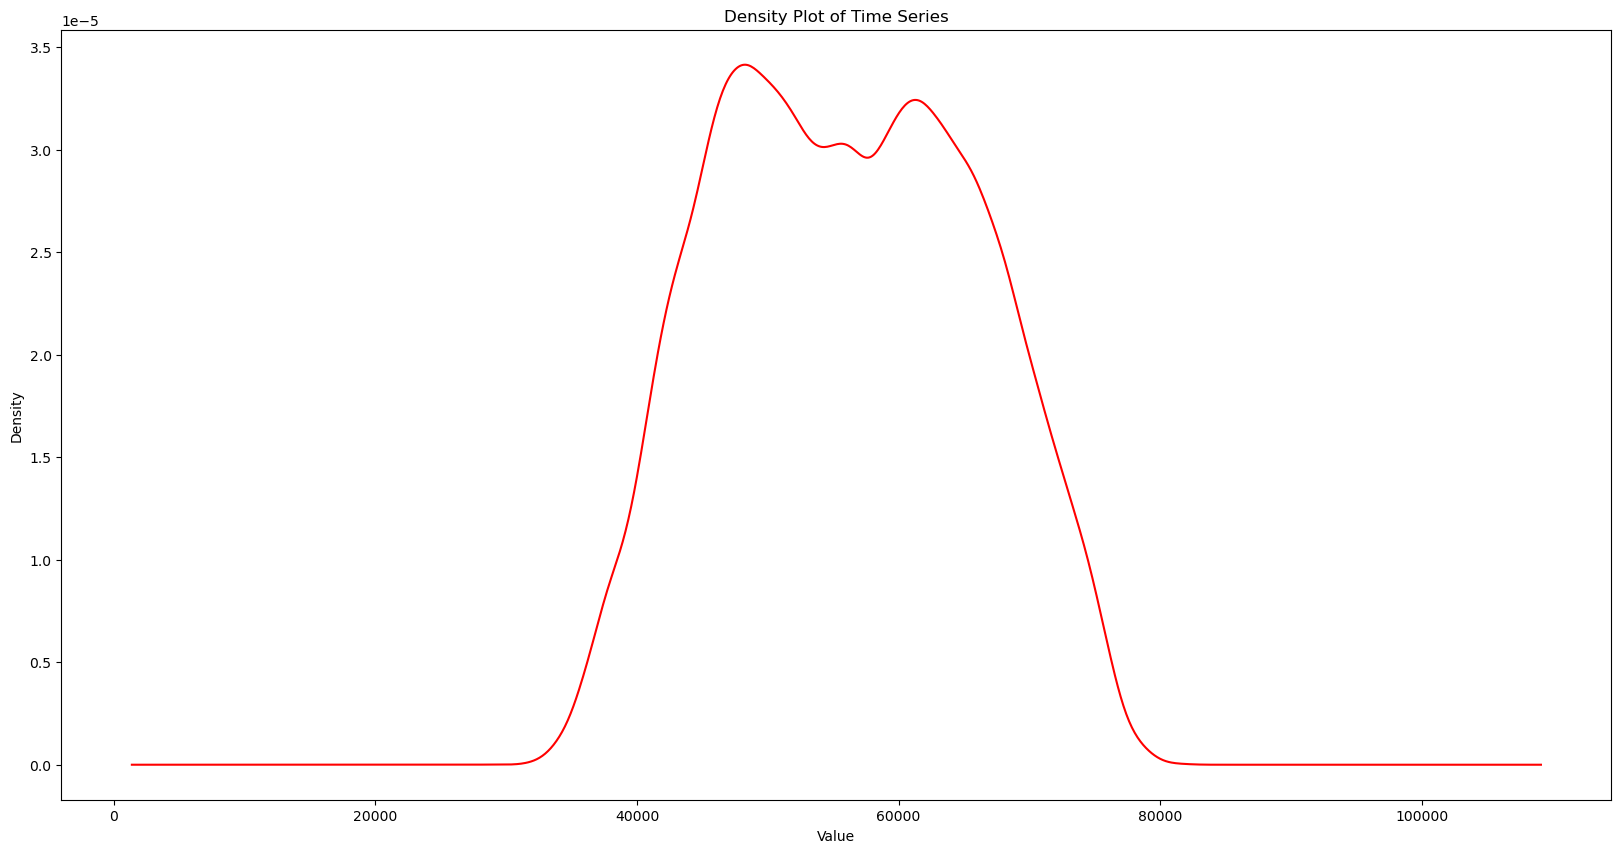

Maximum value from density plot: 82170.0 MW
Minimum value from density plot: 28314.0 MW


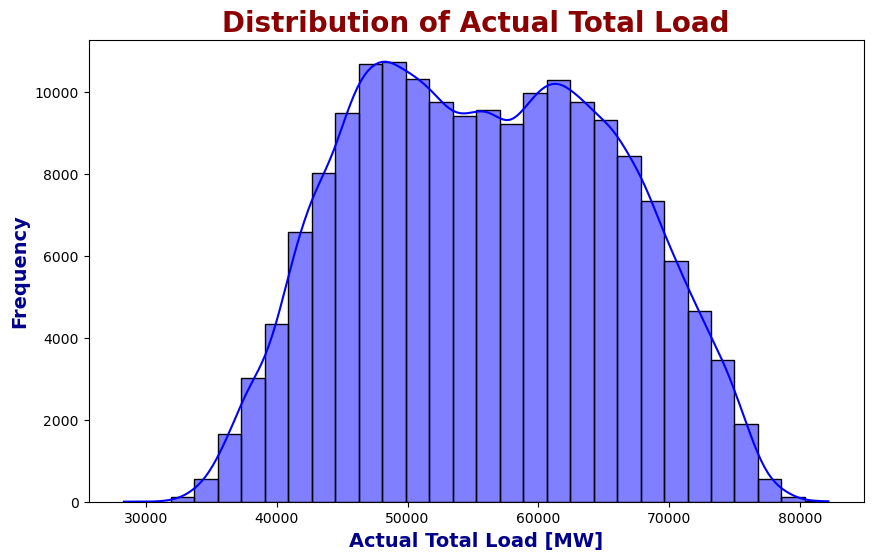

In [10]:
# Denisty Plot
plt.figure(figsize=(20, 10))
df_2['Actual Total Load [MW] - BZN|DE-LU'].plot(kind='density', color='red')
plt.title('Density Plot of Time Series')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
max_value = df_2['Actual Total Load [MW] - BZN|DE-LU'].max()
min_value = df_2['Actual Total Load [MW] - BZN|DE-LU'].min()
print("Maximum value from density plot:", max_value,"MW")
print("Minimum value from density plot:", min_value,"MW")

#SNS HISTO
plt.figure(figsize=(10, 6))
sns.histplot(df_2['Actual Total Load [MW] - BZN|DE-LU'], bins=30, kde=True, color='blue')
plt.xlabel('Actual Total Load [MW]', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Distribution of Actual Total Load', fontsize=20, fontweight='bold', color='darkred')
plt.show()

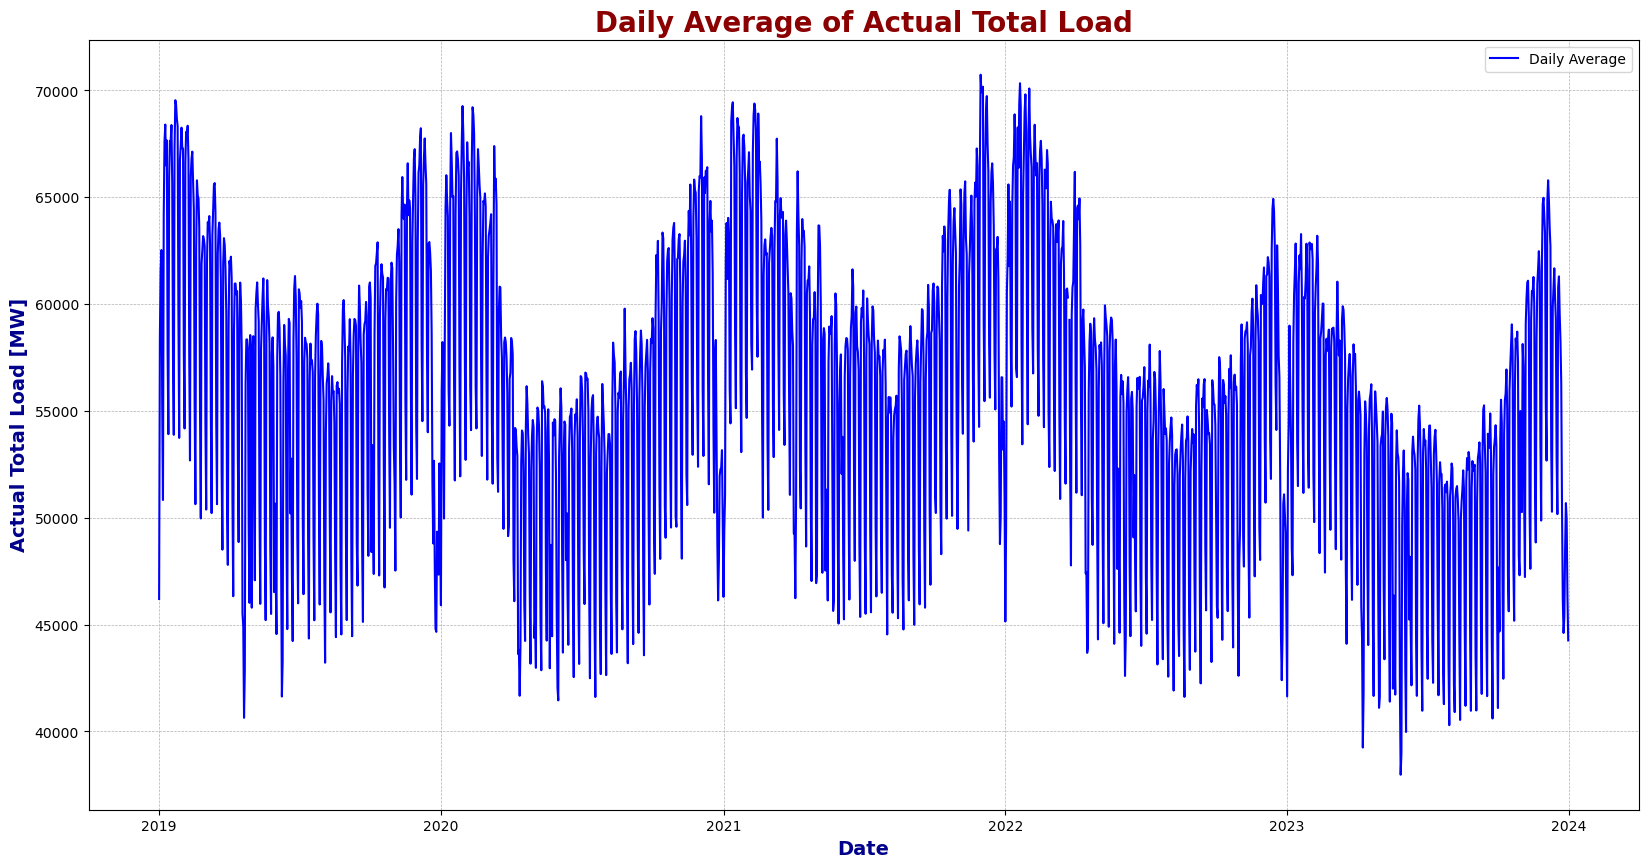

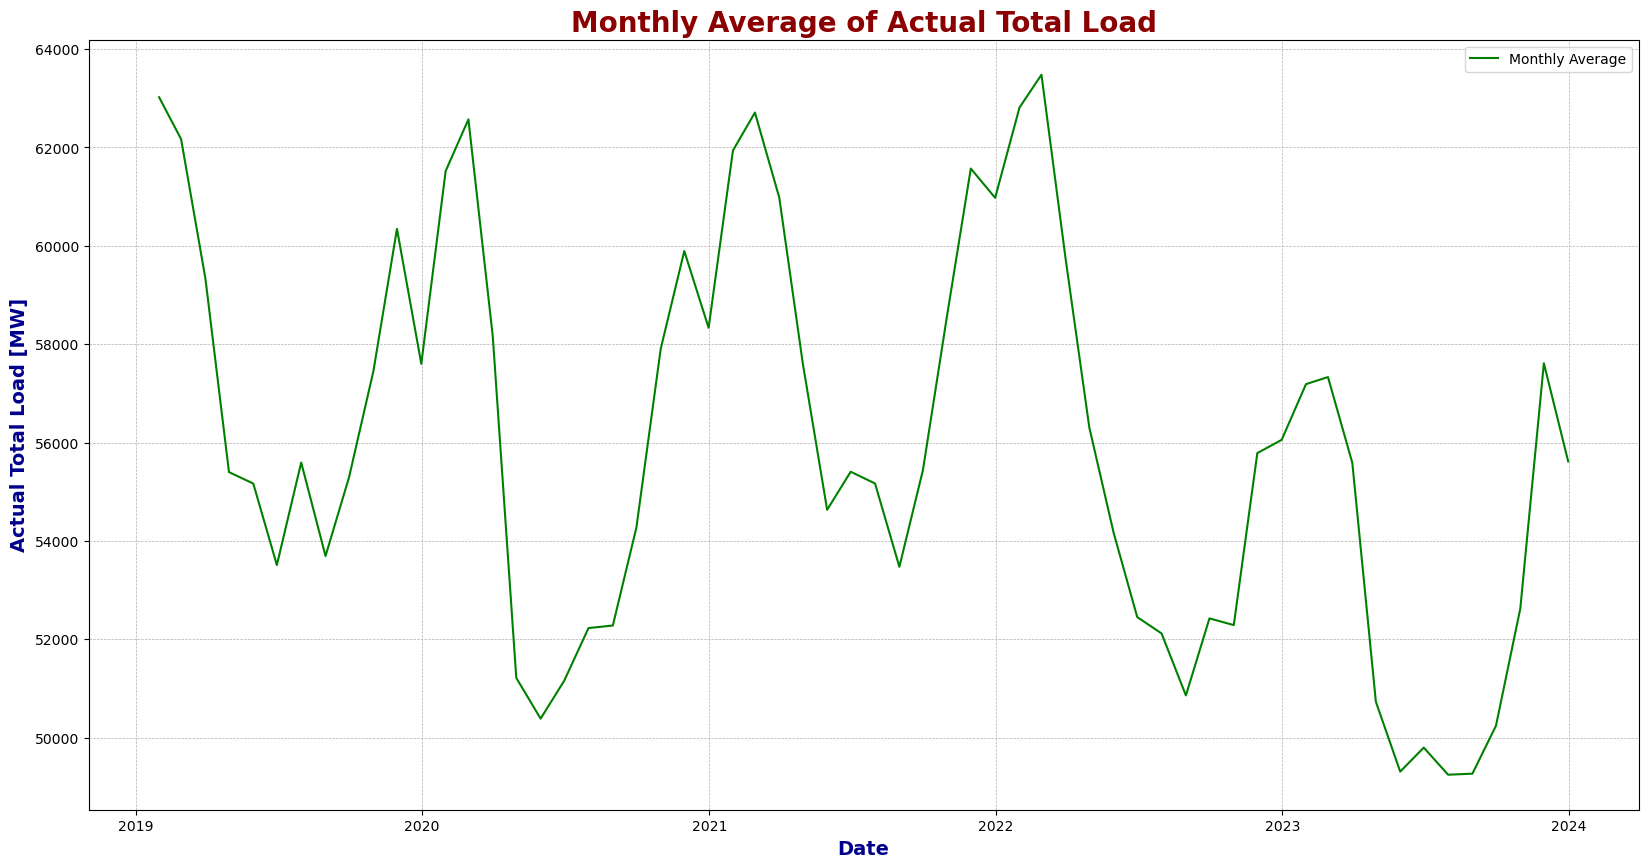

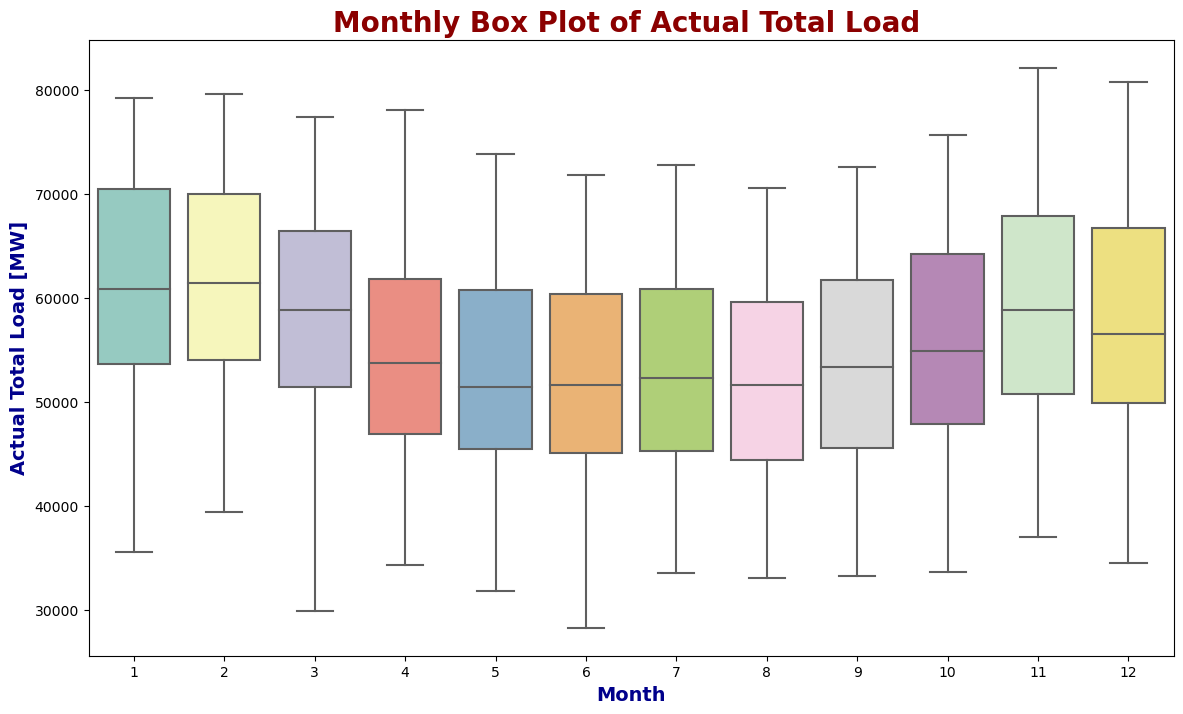

In [11]:
df_daily = df_2.resample('D').mean()
df_monthly = df_2.resample('M').mean()
#df_yearly = df_2.resample('Y').mean()

# Plotting of daily average
plt.figure(figsize=(20, 10))
plt.plot(df_daily.index, df_daily['Actual Total Load [MW] - BZN|DE-LU'], color='blue', label='Daily Average')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Actual Total Load [MW]', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Daily Average of Actual Total Load', fontsize=20, fontweight='bold', color='darkred')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Plotting oof monthly average
plt.figure(figsize=(20, 10))
plt.plot(df_monthly.index, df_monthly['Actual Total Load [MW] - BZN|DE-LU'], color='green', label='Monthly Average')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Actual Total Load [MW]', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Monthly Average of Actual Total Load', fontsize=20, fontweight='bold', color='darkred')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Box Plot by Month
df_2['Month'] = df_2.index.month
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Actual Total Load [MW] - BZN|DE-LU', data=df_2, palette='Set3', )#showfliers=True#
plt.xlabel('Month', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Actual Total Load [MW]', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Monthly Box Plot of Actual Total Load ', fontsize=20, fontweight='bold', color='darkred')
plt.show()


# Task 2: Trend and Seasonal Decomposition

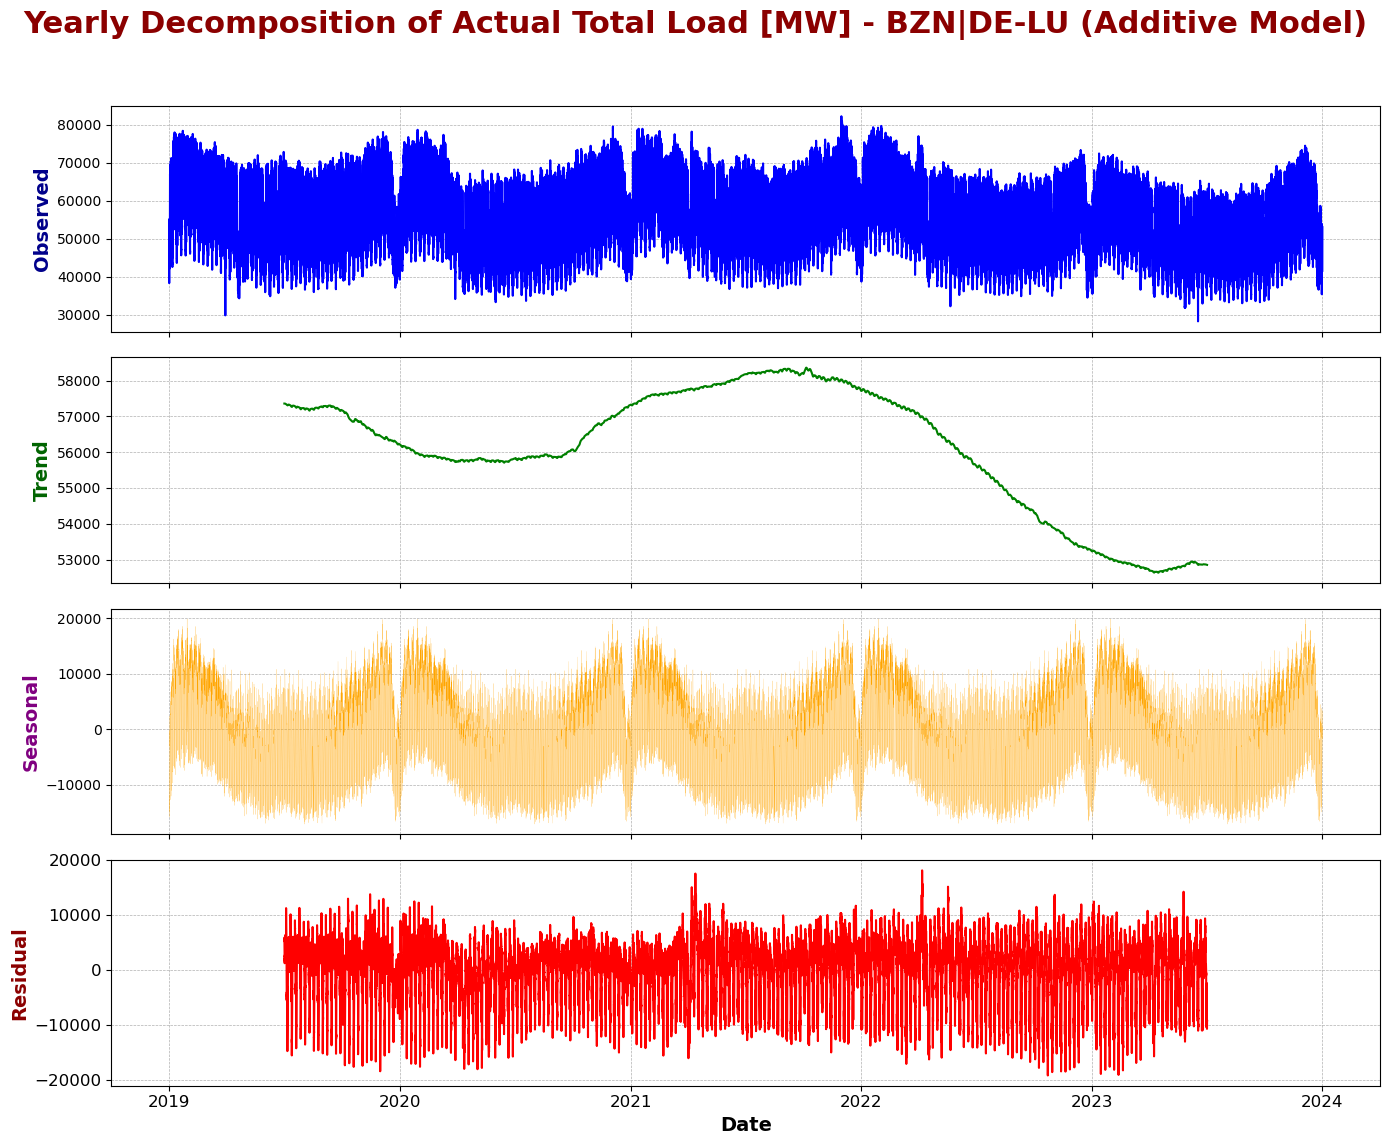

In [12]:
decomposition_yearly = sm.tsa.seasonal_decompose(df_2['Actual Total Load [MW] - BZN|DE-LU'], model='additive', period=365*24*4) # assuming half-hourly data

# USED CHAT GPT for Plot Alingment 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
fig.suptitle('Yearly Decomposition of Actual Total Load [MW] - BZN|DE-LU (Additive Model)', fontsize=22, fontweight='bold', color='darkred')

# Observed
ax1.plot(decomposition_yearly.observed, color='blue', linewidth=1.5)
ax1.set_ylabel('Observed', fontsize=14, fontweight='bold', color='darkblue')
ax1.grid(True, linestyle='--', linewidth=0.5)

# Trend
ax2.plot(decomposition_yearly.trend, color='green', linewidth=1.5)
ax2.set_ylabel('Trend', fontsize=14, fontweight='bold', color='darkgreen')
ax2.grid(True, linestyle='--', linewidth=0.5)

# Seasonal
ax3.plot(decomposition_yearly.seasonal, color='orange', linewidth=0.1)
ax3.set_ylabel('Seasonal', fontsize=14, fontweight='bold', color='purple')
ax3.grid(True, linestyle='--', linewidth=0.5)

# Residual
ax4.plot(decomposition_yearly.resid, color='red', linewidth=1.5)
ax4.set_ylabel('Residual', fontsize=14, fontweight='bold', color='darkred')
ax4.set_xlabel('Date', fontsize=14, fontweight='bold', color='black')
ax4.grid(True, linestyle='--', linewidth=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

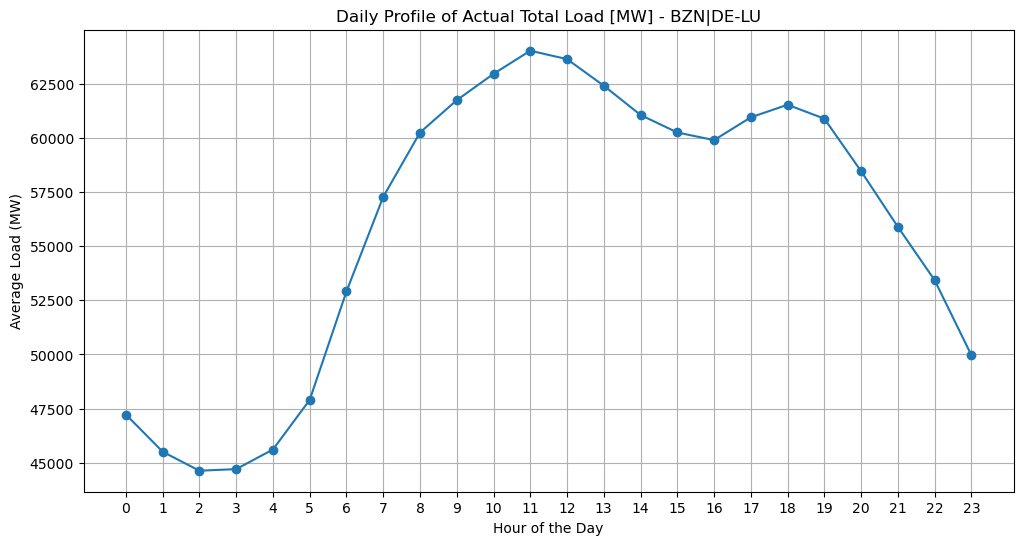

In [13]:
df_2['hour']= df_2.index.hour
daily_profile = df_2.groupby(['hour'])['Actual Total Load [MW] - BZN|DE-LU'].mean()
# Plot the daily profile
plt.figure(figsize=(12, 6))
daily_profile.plot(marker='o', linestyle='-')
plt.title('Daily Profile of Actual Total Load [MW] - BZN|DE-LU')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MW)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [14]:
df_yearly=pd.DataFrame()
df_yearly['trend_yearly'] = decomposition_yearly.trend
df_yearly['season_yearly'] =decomposition_yearly.seasonal
df_yearly['Residual_yearly'] =decomposition_yearly.resid
df_yearly['observed_yearly'] = decomposition_yearly.observed.dropna()
df_yearly['adjusted_values'] = df_yearly['trend_yearly']+df_yearly['season_yearly'] 

In [15]:
df_yearly.dropna(inplace=True) 

In [16]:
mae = mean_absolute_error(df_yearly['observed_yearly'], df_yearly['adjusted_values'])
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(df_yearly['observed_yearly'], df_yearly['adjusted_values']))
print(f"Root Mean Squared Error (RMSE): {rmse}")
r_squared = r2_score(df_yearly['observed_yearly'], df_yearly['adjusted_values'])
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 4136.730629590052
Root Mean Squared Error (RMSE): 5200.974114467689
R-squared: 0.7189360814882464


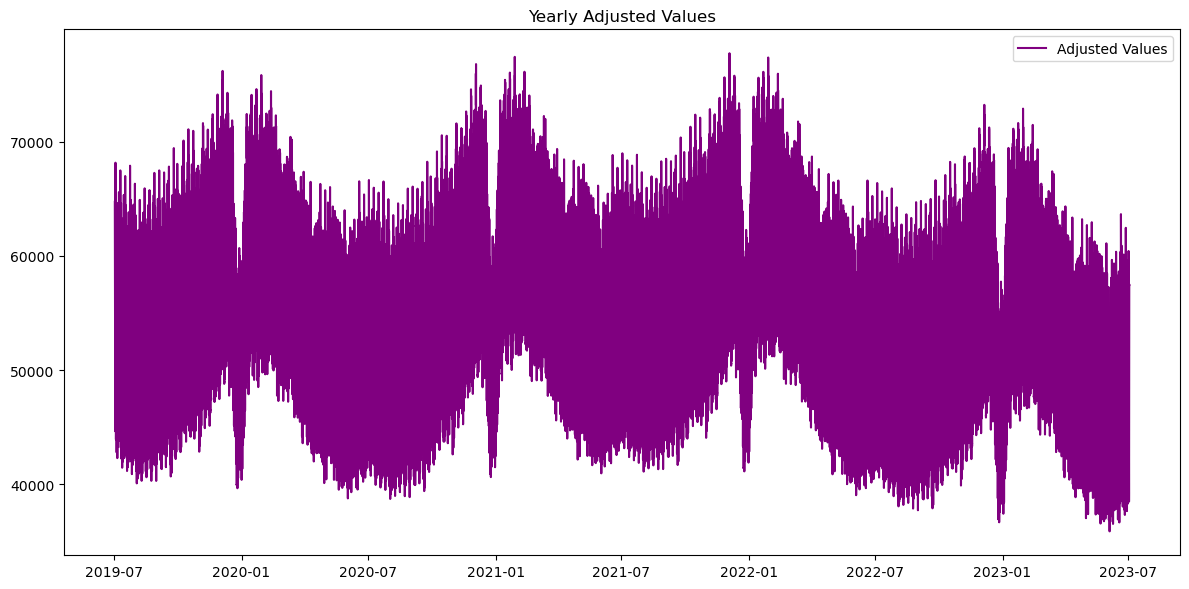

In [17]:
plt.figure(figsize=(12 ,6))

# Adjusted values plot
plt.plot(df_yearly['adjusted_values'], label='Adjusted Values', color='purple')
plt.title('Yearly Adjusted Values')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Task 3

#  Decomposition of daily profiles
    The seasonal fluctuations in the 'Actual Total Load [MW] - BZN|DE-LU' data appear to be roughly constant over time. This means that the magnitude of the seasonal effects does not vary significantly with the level of the time series.
    In the visual inspection of the data, the trend seems to be linear, This suggests that the additive model 

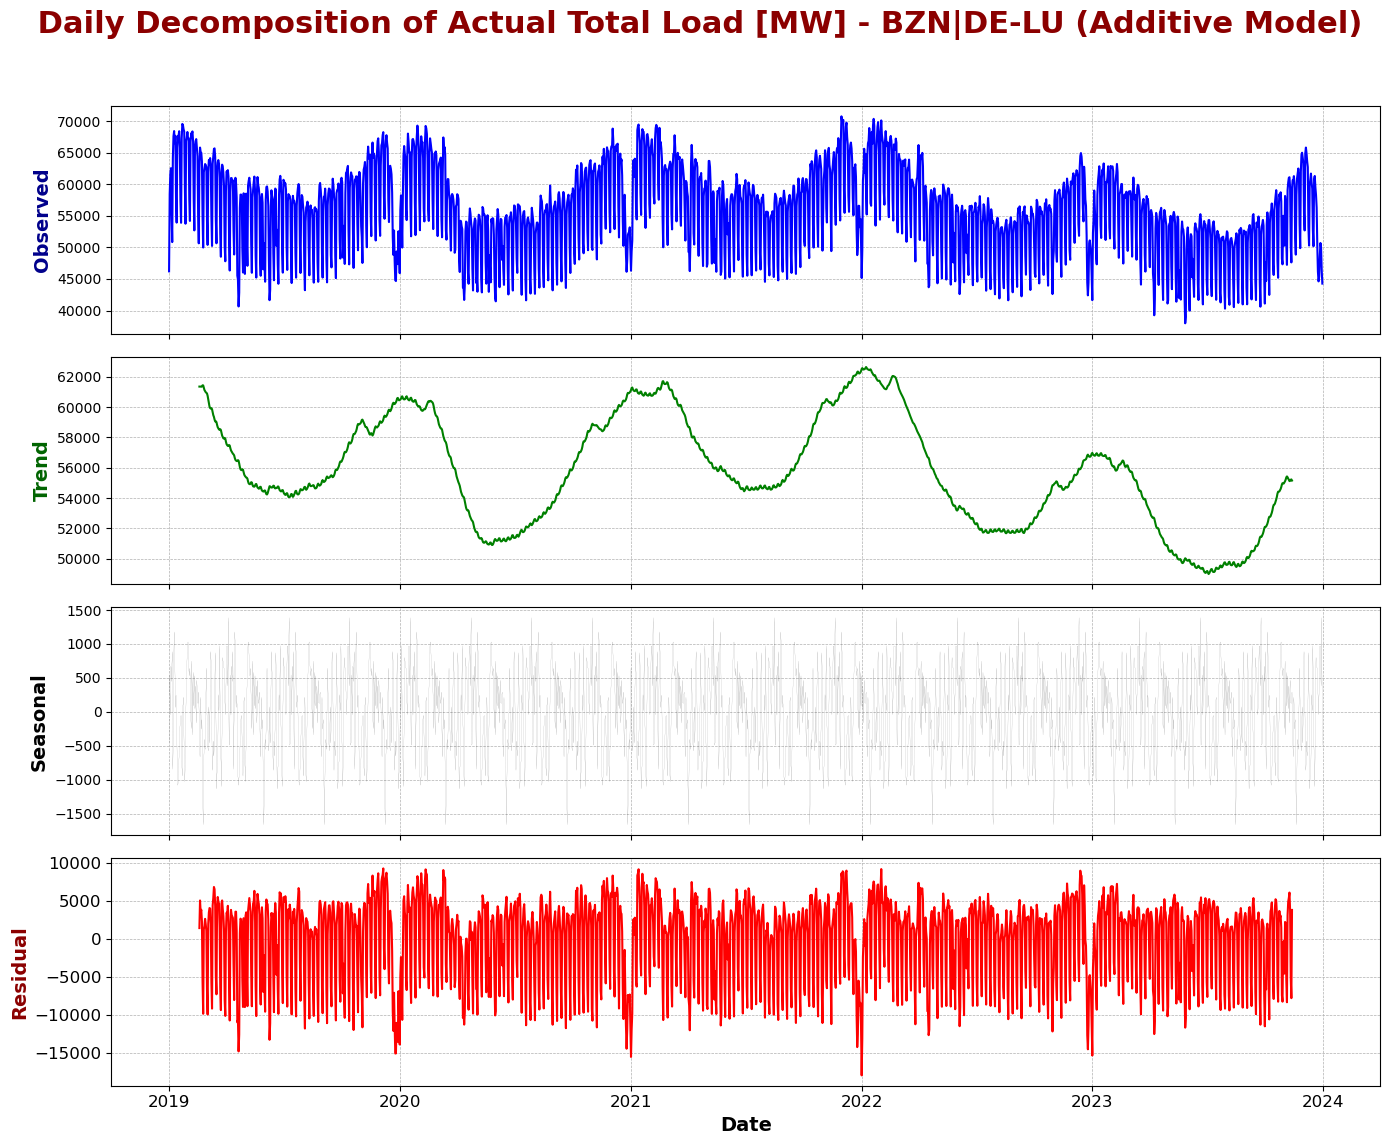

In [18]:
daily_data = df_2.resample('D').mean().dropna()

decomposition_daily = sm.tsa.seasonal_decompose(daily_data['Actual Total Load [MW] - BZN|DE-LU'], model='additive', period=24*4)
# USED CHAT GPT for Plot Alingment 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
fig.suptitle(' Daily Decomposition of Actual Total Load [MW] - BZN|DE-LU (Additive Model)', fontsize=22, fontweight='bold', color='darkred')

# Observed
ax1.plot(decomposition_daily.observed, color='blue', linewidth=1.5)
ax1.set_ylabel('Observed', fontsize=14, fontweight='bold', color='darkblue')
ax1.grid(True, linestyle='--', linewidth=0.5)

# Trend
ax2.plot(decomposition_daily.trend, color='green', linewidth=1.5)
ax2.set_ylabel('Trend', fontsize=14, fontweight='bold', color='darkgreen')
ax2.grid(True, linestyle='--', linewidth=0.5)

# Seasonal
ax3.plot(decomposition_daily.seasonal, color='black', linewidth=0.05)
ax3.set_ylabel('Seasonal', fontsize=14, fontweight='bold', color='black')
ax3.grid(True, linestyle='--', linewidth=0.5)

# Residual
ax4.plot(decomposition_daily.resid, color='red', linewidth=1.5)
ax4.set_ylabel('Residual', fontsize=14, fontweight='bold', color='darkred')
ax4.set_xlabel('Date', fontsize=14, fontweight='bold', color='black')
ax4.grid(True, linestyle='--', linewidth=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Daily Profile of the Data

In [19]:
df_daily=pd.DataFrame()
df_daily['trend_yearly'] = decomposition_daily.trend
df_daily['season_yearly'] =decomposition_daily.seasonal
df_daily['Residual_yearly'] =decomposition_daily.resid
df_daily['observed_yearly'] = decomposition_daily.observed.dropna()
df_daily['adjusted_values'] = df_daily['trend_yearly']+df_daily['season_yearly'] 

In [20]:
df_daily.dropna(inplace=True) 

In [21]:
mae = mean_absolute_error(df_daily['observed_yearly'], df_daily['adjusted_values'])
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mean_squared_error(df_daily['observed_yearly'], df_daily['adjusted_values']))
print(f"Root Mean Squared Error (RMSE): {rmse}")
r_squared = r2_score(df_daily['observed_yearly'], df_daily['adjusted_values'])
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 4731.606440284141
Root Mean Squared Error (RMSE): 5523.2228841037795
R-squared: 0.319377595897386


### 
The R-Square of daily decomposed data is 0.32 which is bad for a good model 

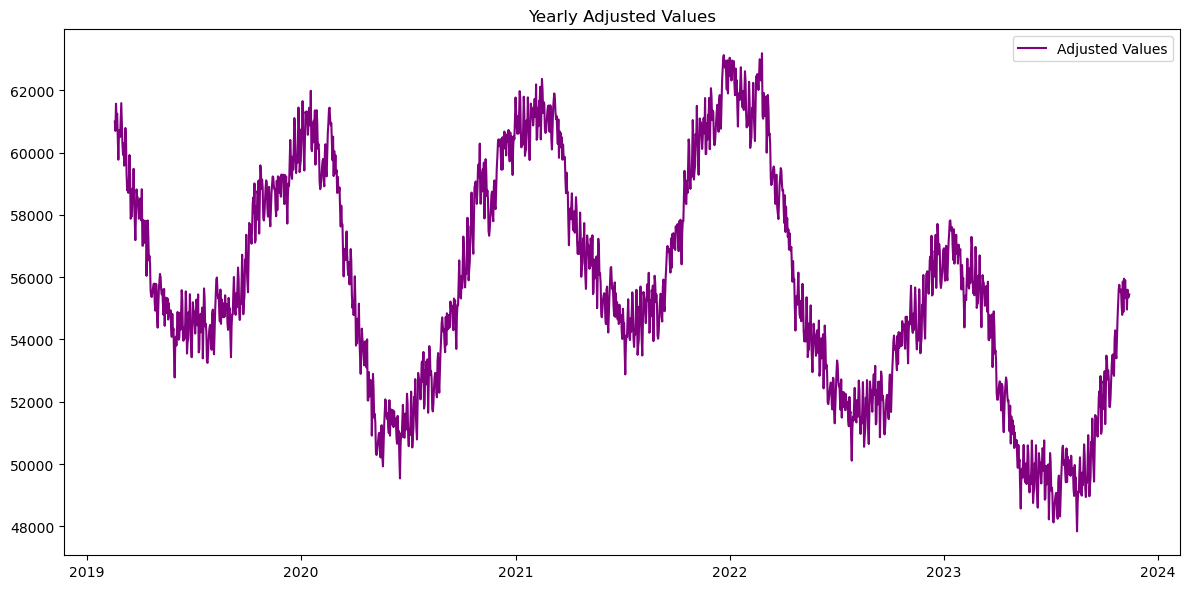

In [22]:
plt.figure(figsize=(12 ,6))

# Adjusted values plot
plt.plot(df_daily['adjusted_values'], label='Adjusted Values', color='purple')
plt.title('Yearly Adjusted Values')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# TASK 4

In [23]:
trend_y = decomposition_yearly.trend.dropna()
seasonal_y = decomposition_yearly.seasonal.dropna()
residual_y = decomposition_yearly.resid.dropna()

In [24]:
residual_y

Date_Time
2019-07-02 13:00:00    5277.337241
2019-07-02 13:15:00    5363.790405
2019-07-02 13:30:00    5345.487048
2019-07-02 13:45:00    5738.928394
2019-07-02 14:00:00    5898.365305
                          ...     
2023-07-02 10:45:00   -9351.648679
2023-07-02 11:00:00   -9333.717151
2023-07-02 11:15:00   -8960.027624
2023-07-02 11:30:00   -9088.831691
2023-07-02 11:45:00   -9162.633696
Name: resid, Length: 140060, dtype: float64

In [25]:
trend_d = decomposition_daily.trend
seasonal_d = decomposition_daily.seasonal
residual_d = decomposition_daily.resid.dropna()

In [26]:
residual_d

Date_Time
2019-02-18    1465.636682
2019-02-19    5094.215014
2019-02-20    3515.425383
2019-02-21    3869.965742
2019-02-22    2332.652268
                 ...     
2023-11-09    6136.518311
2023-11-10    3788.969555
2023-11-11   -5064.950687
2023-11-12   -7747.727256
2023-11-13    3850.378650
Name: resid, Length: 1728, dtype: float64

In [27]:
from statsmodels.tsa.stattools import adfuller


residual_d .dropna(inplace=True)

# Credits : Lab Notes 
# Performed the ADF test
result = adfuller(residual_d )

print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

if result[1] < 0.05:
    print("Residuals are stationary.")
else:
    print("Residuals are not stationary.")

ADF Statistic: -9.866258529773667
p-value: 4.106453557212616e-17
Critical Values:
   1%, -3.434193414492691
Critical Values:
   5%, -2.863237651720356
Critical Values:
   10%, -2.5676737843158324
Residuals are stationary.


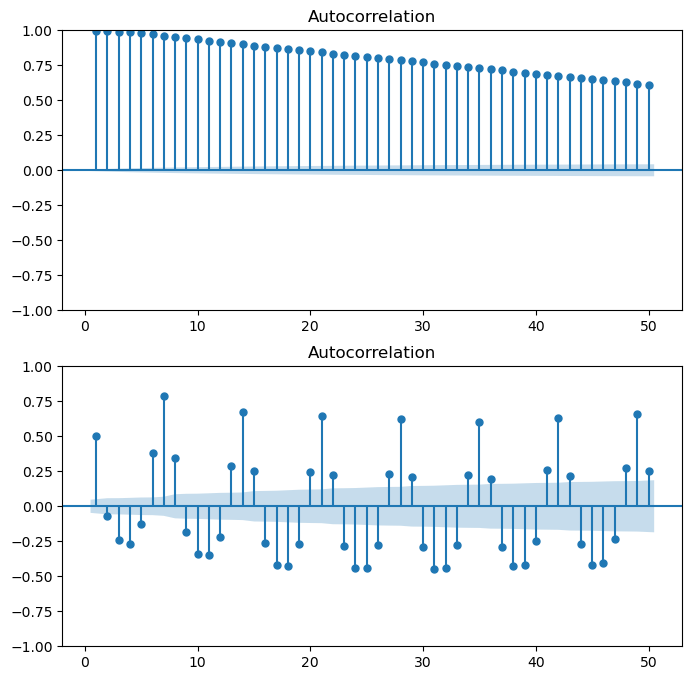

In [28]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,8))

plot_acf(residual_y.dropna(), lags=50, zero=False, ax=ax1)

plot_acf(residual_d.dropna(), lags=50, zero=False,ax=ax2)
plt.show()

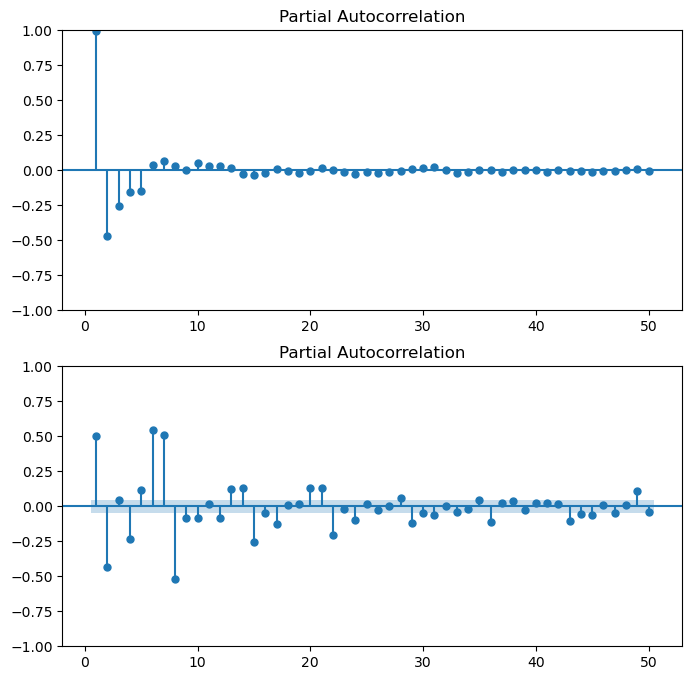

In [29]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,8))

plot_pacf(residual_y.dropna(), lags=50, zero=False, ax=ax1)

plot_pacf(residual_d.dropna(), lags=50, zero=False,ax=ax2)
plt.show()

In [30]:
from statsmodels.tsa.arima.model import ARIMA
for p in range(4):
    for q in range(4):
     try:
        model=ARIMA(df_2['Actual Total Load [MW] - BZN|DE-LU'],order=(p,0,q))
        results=model.fit()
        print(p,q,results.aic,results.bic)
     except:
        print(p,q,None,None)

0 0 5656988.65994349 5657008.806168526
0 1 3484865.563553359 3484895.7828909135
0 2 3277668.036168245 3277708.3286183183
0 3 3124729.4454621878 3124779.811024779
1 0 2779577.4996887418 2779607.7190262964
1 1 2691457.8268496455 2691498.1192997186
1 2 2639579.069329327 2639629.434891918
1 3 None None
2 0 2595568.072234874 2595608.3646849473
2 1 2574432.4888036833 2574482.8543662746
2 2 2574441.6837220397 2574502.1223971494
2 3 None None
3 0 2579278.2649166514 2579328.6304792427
3 1 None None
3 2 None None
3 3 None None


In [67]:

# Defined the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 4)
pdq = [(x[0], x[1], x[2]) for x in list(zip(p, d, q))]

# Initialized dictionary to store AIC values
aic_values = {}

# Evaluate dcombinations of p, d and q for an ARIMA model
for param in pdq:
    try:
        model = ARIMA(df_2['Actual Total Load [MW] - BZN|DE-LU'], order=param)
        model_fit = model.fit()
        aic_values[param] = model_fit.aic
    except Exception as e:
        print(f"Error fitting ARIMA{param}: {e}")
        continue

# Checked if the aic_values is not empty
if aic_values:
    # Find the best combination of parameters
    best_param = min(aic_values, key=aic_values.get)
    print(f'Best ARIMA parameters: {best_param} with AIC: {aic_values[best_param]}')

    best_model = ARIMA(df_2['Actual Total Load [MW] - BZN|DE-LU'], order=best_param)
    best_model_fit = best_model.fit()
    print(best_model_fit.summary())

    residuals = best_model_fit.resid
    
else:
    print("No ARIMA models were successfully fitted.")


Best ARIMA parameters: (1, 1, 1) with AIC: 4762.645004336151
                                       SARIMAX Results                                        
Dep. Variable:     Actual Total Load [MW] - BZN|DE-LU   No. Observations:                  261
Model:                                 ARIMA(1, 1, 1)   Log Likelihood               -2378.323
Date:                                Tue, 28 May 2024   AIC                           4762.645
Time:                                        23:55:37   BIC                           4773.327
Sample:                                    01-06-2019   HQIC                          4766.939
                                         - 12-31-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4012

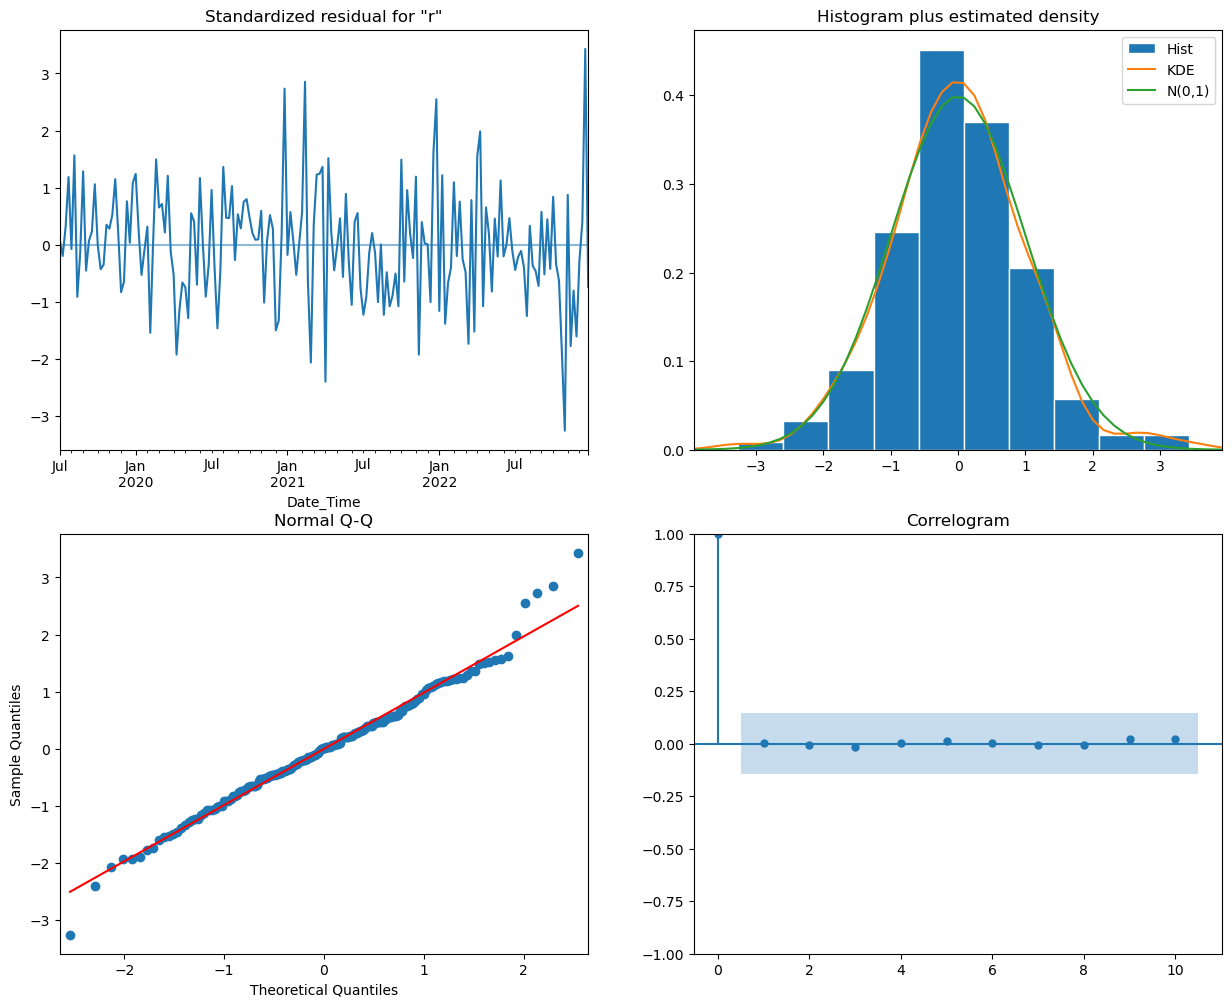

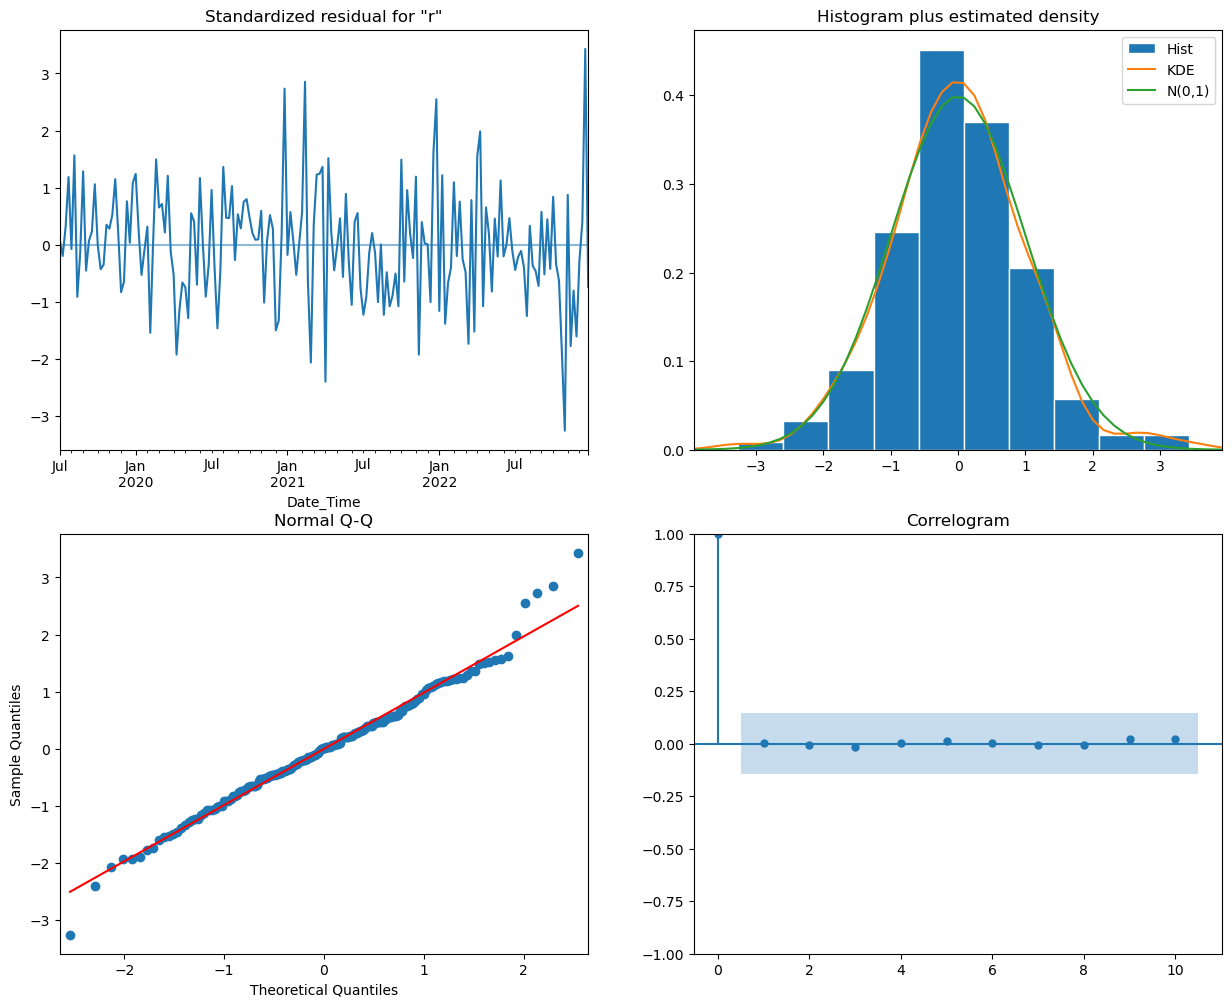

In [66]:
results.plot_diagnostics(figsize=(15,12))

# Task 5

In [32]:
decompositionT5 = sm.tsa.seasonal_decompose(df_2['Actual Total Load [MW] - BZN|DE-LU'], model='additive', period=365*24*4)

In [33]:
df_2['trend'] =decompositionT5.trend
df_2['seasonal'] = decompositionT5.seasonal
df_2['residual'] = decompositionT5.resid

In [34]:
df_2.dropna()

,Actual Total Load [MW] - BZN|DE-LU,Month,hour,trend,seasonal,residual
Date_Time,,,,,,
2019-07-02 13:00:00,70024.0,7,13,57356.404224,7390.258536,5277.337241
2019-07-02 13:15:00,69866.0,7,13,57356.406279,7145.803316,5363.790405
2019-07-02 13:30:00,69363.0,7,13,57356.414740,6661.098212,5345.487048
2019-07-02 13:45:00,69357.0,7,13,57356.426884,6261.644723,5738.928394
2019-07-02 14:00:00,69067.0,7,14,57356.442494,5812.192201,5898.365305
...,...,...,...,...,...,...
2023-07-02 10:45:00,47067.0,7,10,52850.336915,3568.311764,-9351.648679
2023-07-02 11:00:00,47617.0,7,11,52850.331592,4100.385558,-9333.717151
2023-07-02 11:15:00,48308.0,7,11,52850.318251,4417.709374,-8960.027624


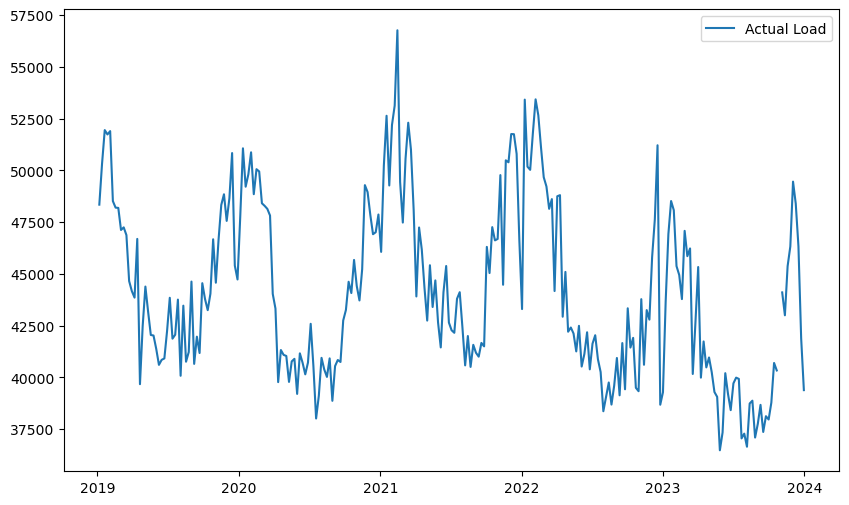

In [53]:
# Preprocess and split the data again
train_data = df_2[:'2022-12-31'].dropna()
test_data = df_2['2023-01-01':].dropna()

# If we want to use the datetime index for forecasting, instead of steps/lags, we have to specify the frequency
# Since we use daily steps we set freq to 'd'
train_data = train_data.loc[~train_data.index.duplicated()]
test_data = test_data.loc[~test_data.index.duplicated()]
df_2 = df_2.loc[~df_2.index.duplicated()]

train_data = train_data.asfreq('w')#.dropna()
test_data = test_data.asfreq('w')#.dropna()
df_2 = df_2.asfreq('w')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df_2.index, df_2['Actual Total Load [MW] - BZN|DE-LU'], label='Actual Load')
plt.legend()
plt.show()

In [54]:
# Fit ARIMA model
model = ARIMA(train_data['residual'].dropna(), order=(3, 0, 3))
results = model.fit()

# Model summary
model_summary = results.summary()
print(model_summary)

                               SARIMAX Results                                
Dep. Variable:               residual   No. Observations:                  182
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1597.747
Date:                Tue, 28 May 2024   AIC                           3211.494
Time:                        23:54:27   BIC                           3237.126
Sample:                    07-07-2019   HQIC                          3221.885
                         - 12-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3233.0966    204.538    -15.807      0.000   -3633.984   -2832.209
ar.L1          0.3297     19.962      0.017      0.987     -38.795      39.454
ar.L2          0.4964      5.694      0.087      0.9

In [55]:
train_data['residuals_predicted']=results.fittedvalues

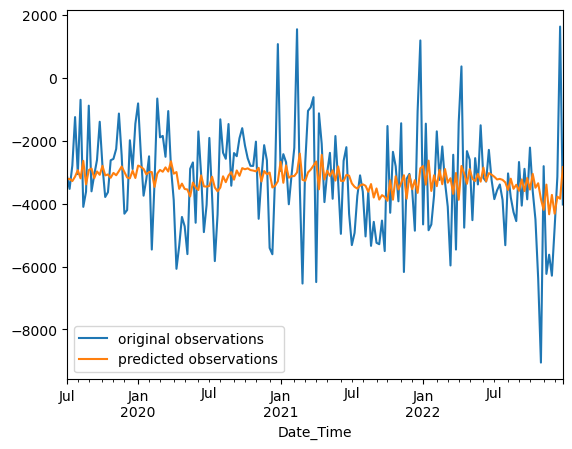

In [56]:
train_data['residual'].plot(label="original observations")
train_data['residuals_predicted'].plot(label="predicted observations")
plt.legend()

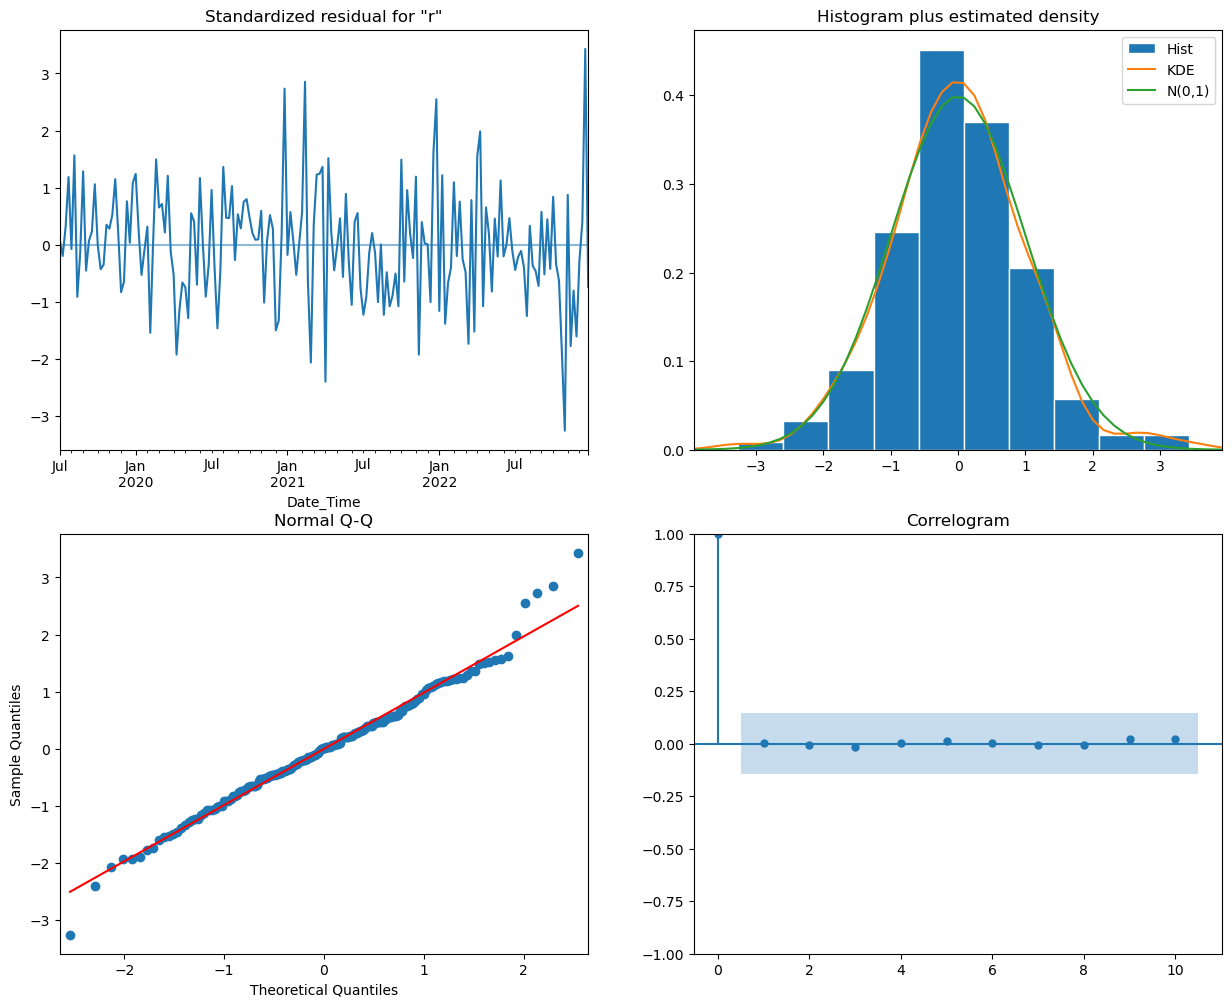

In [57]:
# Let's analyse the forecast
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [58]:
# Predict on axis of test dataframe

pred = results.get_prediction(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
pred_ci = pred.conf_int()

In [59]:
#Store results in test dataframe

test_data['residuals_predicted']=pred.predicted_mean
test_data['lower residual']=pred_ci['lower residual']
test_data['upper residual']=pred_ci['upper residual']

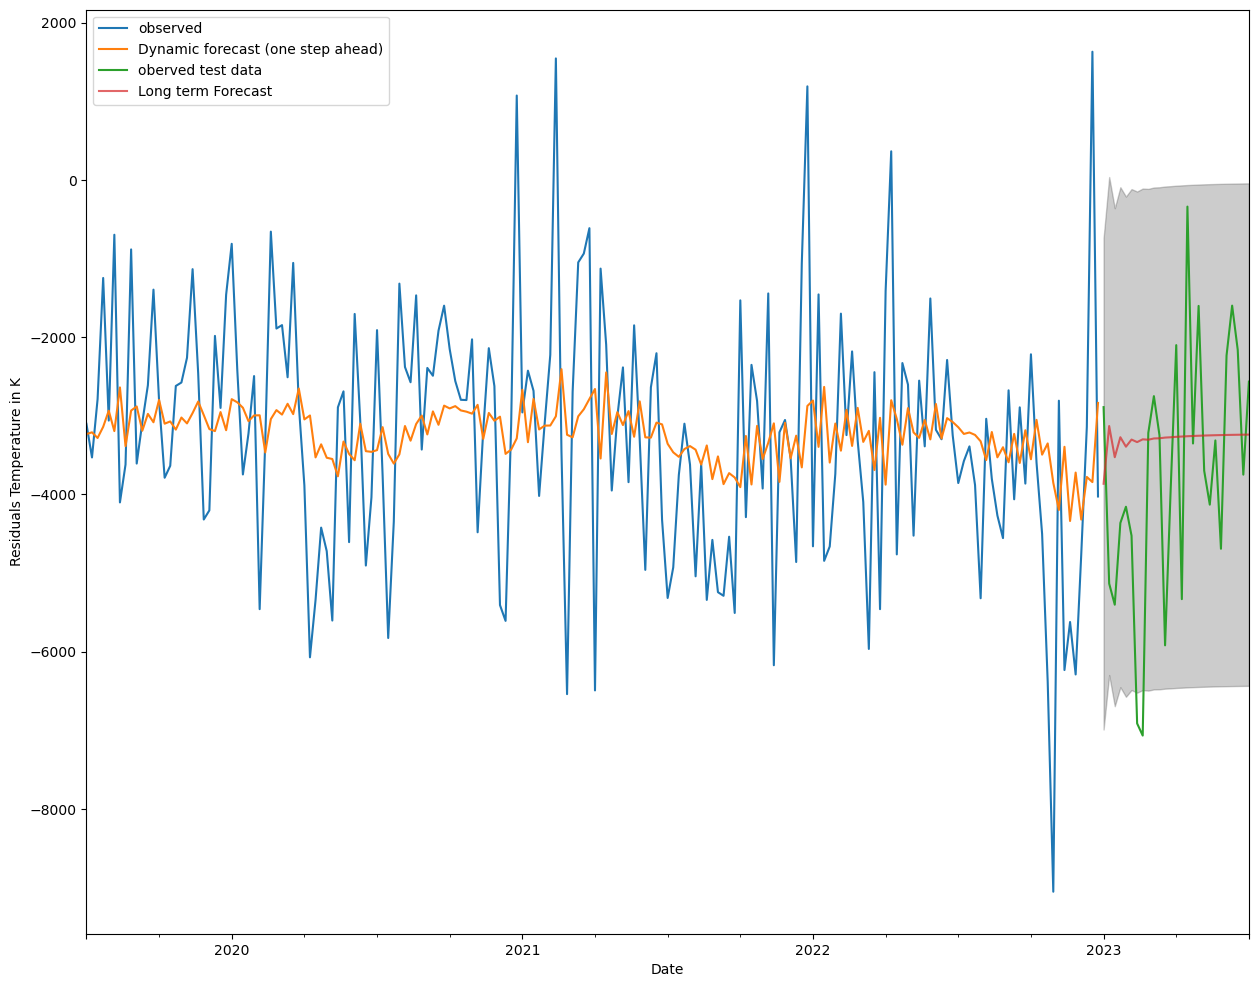

In [60]:
ax = train_data['residual'].plot(label='observed', figsize=(15,12))

train_data['residuals_predicted'].plot(label='Dynamic forecast (one step ahead)')
test_data['residual'].plot(label='oberved test data')
test_data['residuals_predicted'].plot(ax=ax, label='Long term Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Residuals Temperature in K')
#plt.xlim('2023-1','2023-03')
plt.legend()

plt.show()

In [61]:
test_data

,Actual Total Load [MW] - BZN|DE-LU,Month,hour,trend,seasonal,residual,residuals_predicted,lower residual,upper residual
Date_Time,,,,,,,,,
2023-01-01,39287.0,1.0,0.0,53229.287129,-11051.886238,-2890.400891,-3865.077240,-6990.443494,-739.710987
2023-01-08,43669.0,1.0,0.0,53171.751498,-4368.147090,-5134.604408,-3131.102578,-6297.828491,35.623335
2023-01-15,46922.0,1.0,0.0,53128.278168,-803.572558,-5402.705610,-3527.443087,-6694.186553,-360.699620
2023-01-22,48520.0,1.0,0.0,53063.250029,-179.618559,-4363.631470,-3273.284479,-6452.730013,-93.838946
2023-01-29,48076.0,1.0,0.0,53005.674215,-772.298910,-4157.375306,-3393.461389,-6574.290656,-212.632123
2023-02-05,45376.0,2.0,0.0,52957.726741,-3056.367560,-4525.359181,-3303.016007,-6488.479257,-117.552758
2023-02-12,44949.0,2.0,0.0,52930.946618,-1069.025055,-6912.921563,-3335.355681,-6522.400683,-148.310678
2023-02-19,43784.0,2.0,0.0,52893.659846,-2042.196805,-7067.463041,-3299.937606,-6489.145486,-110.729725
2023-02-26,47079.0,2.0,0.0,52877.228025,-2579.844218,-3218.383807,-3305.204799,-6495.595339,-114.814258


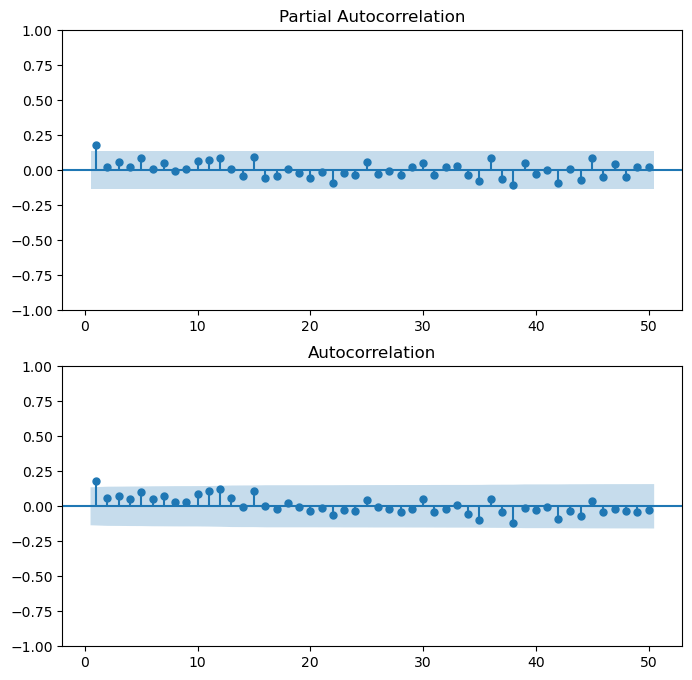

In [62]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,8))

plot_acf(df_2['residual'].dropna(),lags=50,zero=False,ax=ax2)
plot_pacf(df_2['residual'].dropna(), lags=50, zero=False, ax=ax1)


plt.show()

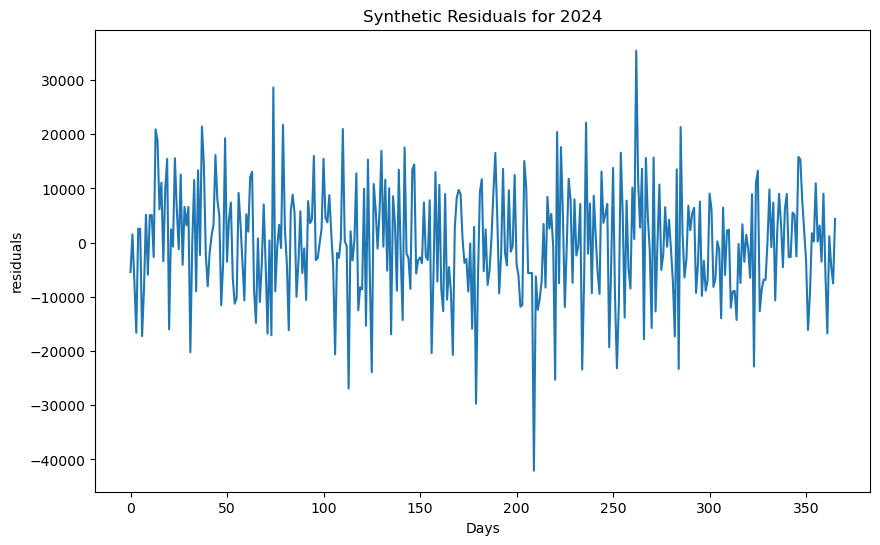

In [64]:
 from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


# Fit ARMA model to residuals
arma_model = ARIMA(df_2['residual'], order=(1,1,1)).fit()

# Get ARMA parameters
ar_params = arma_model.arparams
ma_params = arma_model.maparams

# Generate synthetic residuals for 2024
np.random.seed(42)
synthetic_residuals = ArmaProcess(ar_params, ma_params).generate_sample(nsample=366, scale=df_2['residual'].std())

# Plot synthetic residuals
plt.figure(figsize=(10, 6))
plt.plot(synthetic_residuals)
plt.xlabel('Days')
plt.ylabel('residuals')

plt.title('Synthetic Residuals for 2024')
plt.show()

# Documentation:

## Precentage of Contribution:

    Task 1:- Bhanu Simha : 100%
    Task 2:- Bhanu Simha : 100%
    Task 3:- Bhanu Simha : 95% and Ramesh%: 5%
    Task 4:- Ramesh: 100%
    Task 5:- Ramesh: 100%